# Содержание

1  **Обзор и предобработка данных**

1.1  Обзор данных

1.2  Предобработка данных

2  **Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии**

2.1  Создание функции профилей get_profiles()

2.2  Функция для расчета коэффициента удержания - Retention Rate

2.3  Функция для расчета конверсии - Conversation Rate

2.4  Функция для расчета LTV(пожизненная ценность клиента) и ROI(окупаемость вложенных инвестиций)

2.5  Создание функций для визуализации анализируемых данных

3  **Исследовательский анализ данных**

3.1  Создание профилей пользователей с помощью раннее сформированной функции get_profiles()

3.2  Страны привлеченных пользователей и доля стран в разрезе платящих пользователей

3.3  Устройства клиентов и доля платящих пользователей для каждого устройства

3.4  Каналы привлечения клиентов и их доля среди платящих пользователей

4  **Маркетинг**

4.1  Анализ расходов. Определение общей суммы расходов на маркетинг

4.2  Распределение расходов по рекламным источникам

4.3  Средняя стоимость привлечения одного пользователя из каждого источника

5  **Оцените окупаемость рекламы**

5.1  Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI

5.2  Конверсия пользователей, удержание пользователей и динамика их изменений. Визуализация показателей

5.2.1  Конверсия пользователей, удержание пользователей с разбивкой по устройствам

5.2.2  Конверсия пользователей, удержание пользователей с разбивкой по странам

5.2.3  Конверсия пользователей, удержание пользователей с разбивкой по каналам привлечения

5.3  Окупаемость рекламы с разбивкой по устройствам. Визуализация LTV и ROI, а также графики динамики LTV, CAC и ROI

5.4  Окупаемость рекламы с разбивкой по странам. Визуализация LTV и ROI, а также графики динамики LTV, CAC и ROI

5.5  Окупаемость рекламы с разбивкой по рекламным каналам. Визуализация LTV и ROI, а также графики динамики LTV, CAC 
и ROI

6  **Вывод**

# Исследование об эффективности инвестирования в рекламу приложения Procrastinate Pro+

В предостоящем проекте рассмотрим основные показатели, отражающие успешность вложения инвестиций в рекламу развлекательного приложения Procrastinate Pro+.

Цель исследования — выявить причины неэффективности рекламных кампаний, проводимых с целью привлечения пользователей.

Анализ данных пройдёт по следующим направлениям:

- Обзор и предобработка данных
- Определение функций для анализа LTV(ценность клиента для компании за период взаимодействия), ROI(окупаемость вложенных средств в рекламу), коэффициента удержания пользователей и конверсии
- Проведение исследовательского анализа данных
- Анализ расходов, произведенных в целях рекламы продукта
- Анализ окупаемости вложенных инвестиций

## Обзор и предобработка данных

### Обзор данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

Обзор данных о посещениях

In [4]:
visits.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [6]:
visits.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [7]:
visits.duplicated().sum()

0

In [8]:
visits['Channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [9]:
visits['Device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

Таким образом:
- Исходные данные содержат 309 901 строк и 6 стобцов;
- Несоответствующий тип данных выявлен у столбцов Session Start и Session End: тип "object" необходимо изменить на "date";
- Пропущенные значения отсутствуют;
- Явные и неявные дубликаты отсутствуют;
- Необходимо перести названия стобцов к нижнему регистру;
- Преобразовать названия столбцов User Id, Session Start, Session End, добавив в наименование нижнее подчеркивание.

Обзор данных о заказах

In [10]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.990
1,174361394180,2019-05-01 12:24:04,4.990
2,529610067795,2019-05-01 11:34:04,4.990
3,319939546352,2019-05-01 15:34:40,4.990
4,366000285810,2019-05-01 13:59:51,4.990


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [12]:
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [13]:
orders.duplicated().sum()

0

Таким образом:

- Исходные данные содержат 40 212 строк и 3 стобца;
- Несоответствующий тип данных выявлен у столбца Event Dt: тип "object" необходимо изменить на "date";
- Пропущенные значения и дубликаты отсутствуют;
- Необходимо перести названия стобцов к нижнему регистру,
- Преобразовать названия столбцов User Id, Event Dt, добавив в наименование нижнее подчеркивание.

Обзор данных о расходах

In [14]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.300
1,2019-05-02,FaceBoom,78.100
2,2019-05-03,FaceBoom,85.800
3,2019-05-04,FaceBoom,136.400
4,2019-05-05,FaceBoom,122.100


In [15]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [16]:
costs.isna().sum()

dt         0
Channel    0
costs      0
dtype: int64

In [17]:
costs.duplicated().sum()

0

In [18]:
costs['Channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Таким образом:

- Исходные данные содержат 1 800 строк и 3 стобца;
- Несоответствующий тип данных выявлен у столбца dt: тип "object" необходимо изменить на "date";
- Пропущенные значения отсутствуют;
- Явные и неявные дубликаты отсутствуют;
- Необходимо перести названия стобцов к нижнему регистру.

### Предобработка данных

Приведение названий столбцов к нижнему регистру

In [19]:
visits.columns = visits.columns.str.lower()
visits['channel'] = visits['channel'].str.lower()
visits['device'] = visits['device'].str.lower()
visits.head()

,user id,region,device,channel,session start,session end
0,981449118918,United States,iphone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iphone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,android,tiptop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [20]:
orders.columns = orders.columns.str.lower()
orders.head()

,user id,event dt,revenue
0,188246423999,2019-05-01 23:09:52,4.990
1,174361394180,2019-05-01 12:24:04,4.990
2,529610067795,2019-05-01 11:34:04,4.990
3,319939546352,2019-05-01 15:34:40,4.990
4,366000285810,2019-05-01 13:59:51,4.990


In [21]:
costs.columns = costs.columns.str.lower()
costs['channel'] = costs['channel'].str.lower()
costs.head()

,dt,channel,costs
0,2019-05-01,faceboom,113.300
1,2019-05-02,faceboom,78.100
2,2019-05-03,faceboom,85.800
3,2019-05-04,faceboom,136.400
4,2019-05-05,faceboom,122.100


Преобразование столбцов в необходимый тип данных

In [22]:
visits['session start'] = pd.to_datetime(visits['session start'])
visits['session end'] = pd.to_datetime(visits['session end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session start  309901 non-null  datetime64[ns]
 5   session end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [23]:
orders['event dt'] = pd.to_datetime(orders['event dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user id   40212 non-null  int64         
 1   event dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [24]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Изменение наименования столбцов

In [25]:
visits = visits.rename(
columns={
'user id': 'user_id',
'session start': 'session_start',
'session end': 'session_end'}
)
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iphone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iphone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,android,tiptop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [26]:
orders = orders.rename(
columns={
'user id': 'user_id',
'event dt': 'event_dt'}
)
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.990
1,174361394180,2019-05-01 12:24:04,4.990
2,529610067795,2019-05-01 11:34:04,4.990
3,319939546352,2019-05-01 15:34:40,4.990
4,366000285810,2019-05-01 13:59:51,4.990


Таким образом, после детального рассмотрения данных была проведена их предобработка: изменены регистры названий столбцов, изменены типы данных. Пропущенные и дублирующие значения в датасетах отсутствуют.

## Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Создание функции профилей get_profiles()

In [27]:
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    #costs['acquisition_cost'] = costs.set_index('key').join(new_users.set_index('key'))

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']
    
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция для расчета коэффициента удержания - Retention Rate

In [28]:
def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчета конверсии - Conversation Rate

In [29]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчета LTV(пожизненная ценность клиента) и ROI(окупаемость вложенных инвестиций)

In [30]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Таким образом, были созданы функции для вычисления метрик, отражающих эффективность взаимодейтсвия пользователя и программного продукта с точки зрения получения прибыли: 
- Retention Rate(коэффициент, отражающий длительность удержания пользователей);
- Conversion Rate, конверсия(процент пользователей когорты, совершивших какое-либо действие)
- LTV (ценность от взаимодействия с клиентом, выраженная в полученной прибыли);
- ROI (окупаемость вложенных инвестиций)

### Создание функций для визуализации анализируемых данных

Функция для сглаживания данных

In [31]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

Функция для построения графика Retention Rate (графика удержания пользователей)

In [32]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

Функция для построения графика конверсии

In [33]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Функция для визуализации показателей LTV и ROI

In [34]:
# 

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Для проведения исследовательского анализа данных были подготовлены расчетные функции необходимых показателей и функции для их корректной визуализации

## Исследовательский анализ данных


### Создание профилей пользователей с помощью раннее сформированной функции get_profiles()

In [35]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,United States,2019-05-07,2019-05-01,True,1.088
1,4919697,2019-07-09 12:46:07,faceboom,iphone,United States,2019-07-09,2019-07-01,False,1.107
2,6085896,2019-10-01 09:58:33,organic,iphone,France,2019-10-01,2019-10-01,False,0.000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,Germany,2019-08-22,2019-08-01,False,0.988
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,United States,2019-10-02,2019-10-01,False,0.231


Определение минимальной и максимальной дат привлечения пользователей

In [36]:
min_date = costs['dt'].min()
min_date

datetime.date(2019, 5, 1)

In [37]:
max_date = costs['dt'].max()
max_date

datetime.date(2019, 10, 27)

Минимальная и максимальная даты привлечения пользователей сопоставимы с диапазоном анализа, который определен в техническом задании.

Определим следующие данные для дальнейшего расчета метрик: 
    
- момент анализа "observation_date" (1 ноября 2019);
- горизонт анализа "horizon_days" (14 дней). Данный интервал определен тем, что пользователи должны окупаться не позднее, чем через две недели после привлечения. 

In [38]:
observation_date = datetime(2019, 11, 1).date()
observation_date

datetime.date(2019, 11, 1)

In [39]:
horizon_days = 14

### Страны привлеченных пользователей и доля стран в разрезе платящих пользователей

In [40]:
profiles.groupby('region').agg({'user_id' : 'nunique','payer': 'mean'}).sort_values(by='payer', ascending=False).round(3)

,user_id,payer
region,,
United States,100002,0.069
Germany,14981,0.041
UK,17575,0.040
France,17450,0.038


Таким образом, большее число пользователей приложением наблюдается в США, где доля платящих клиентов составляет 6%. На мой взгляд, это обусловлено тем, что приложение имеет большую популярность в США: количество привлеченных пользователей превышает в 5-6 раз чем в других странах.

Доля пользователей Германии, Великобритании и Франции, совершивших оплату, варьируется от 3% до 4%.

### Устройства клиентов и доля платящих пользователей для каждого устройства.

In [41]:
profiles.groupby('device').agg({'user_id' : 'nunique','payer': 'mean'}).sort_values(by='payer', ascending=False).round(3)

,user_id,payer
device,,
mac,30042,0.064
iphone,54479,0.062
android,35032,0.059
pc,30455,0.050


Исходя из полученных данных, мы видим, что самым используемым устройством среди пользователей явлется iphone - 54 479 пользователей.
Однако, данный факт не обуславливает превосходство iphone в разрезе платящих пользователей по сравнению с другими средствами, таких, как pc, android и mac. Самой популярной платформой среди пользователей, готовых совершить покупку, явлется mac- 6% от общего чила пользователей. 

### Каналы привлечения клиентов и их доля среди платящих пользователей.

In [42]:
profiles.groupby('channel').agg({'user_id' : 'nunique','payer': 'mean'}).sort_values(by='payer', ascending=False).round(3)

,user_id,payer
channel,,
faceboom,29144,0.122
adnonsense,3880,0.113
lambdamediaads,2149,0.105
tiptop,19561,0.096
rocketsuperads,4448,0.079
wahoonetbanner,8553,0.053
yrabbit,4312,0.038
mediatornado,4364,0.036
leapbob,8553,0.031


Анализируя полученную выгрузку, важно отметить, что весомая часть пользователей стала использовать приложение, зайдя по прямой ссылке или с помощью обычных запросов в поисковых системах, а не платных рекламных объявлений, то есть, органические пользователи - 56439 пользователей, среди которых 2% являются платящими (наименьшая доля среди источников привлечения).

Самым распространенным каналом привлечения пользователей явлется faceboom - 29144 клиента, среди которых 12,2% являются платящими (самая большая доля среди остальных рекламных источников).
Самым непопулярным источником привлечения явлется adnonsense - 3880 человек, однако, плотность платящих пользователей, 11,3%, заметно превышает такую долю у средне-популярного канала, количество привлеченных пользователей которого варьируется от 4000 до 10000(rocketsuperads, wahoonetbanner, yrabbit, mediatornado, leapbob, opplecreativemedia), а доля пользователей, совершивших оплату от 7% до 2%.




Таким образом, проведя исследовательский анализ пользовательского сегмента развлекательного приложения Procrastinate Pro+, подведем следующие итоги:

- Пользователи сосредоточены в 4-х регионах:
1. США (100 002чел.);
2. Великобритания(17 575чел.);
3. Франция(17 450чел.); 
4. Германия(14 981чел.). 

Наибольшая доля платящих пользователей определена в США (6%), наименьшая доля платящих пользователей - во Франции(3,8%);


- Использование приложения происходит с 4-х устройств: 
1. mac (30 042чел.); 
2. iphone(54 479чел.); 
3. android(35 032чел.); 
4. pc(30 455чел.). 

Доля платящих пользователей среди всех устройств распределена от 5% до 6,5%, где: самое востребованное - mac, менее востребованное - pc;


- Привлечение пользователей происходит через 10 рекламных источников и органический (самостоятельный поиск приложения пользователями). Наибольшую долю платящих клиентов предоставляет рекламный источник faceboom(12,2%), наименьшую долю предоставляет органический источник -2,1%.

## Маркетинг


### Анализ расходов. Определение общей суммы расходов на маркетинг

In [43]:
costs.head(5)

,dt,channel,costs
0,2019-05-01,faceboom,113.300
1,2019-05-02,faceboom,78.100
2,2019-05-03,faceboom,85.800
3,2019-05-04,faceboom,136.400
4,2019-05-05,faceboom,122.100


In [44]:
costs['costs'].describe()

count   1800.000
mean      58.610
std      107.740
min        0.800
25%        6.495
50%       12.285
75%       33.600
max      630.000
Name: costs, dtype: float64

Выявленное среднее отклонение показывает, что в данных существует разброс: есть и постепенно небольшие вложения в рекламу, например минимальное значение - 0,8, и достаточно большие вложения относительно других - 630 (максимальное значение). Таким образом, обуславливается разница между медианным значением и средним, которое повышается засчет дорогостоящих вложений.

In [45]:
costs.costs.sum().round(1)

105497.3

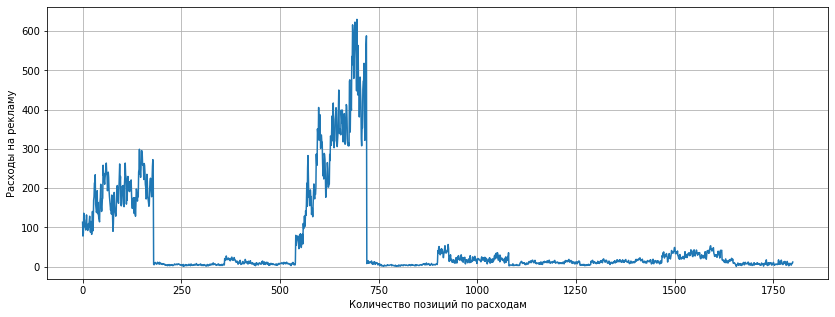

In [46]:
costs.plot(y='costs', figsize=(14, 5), grid=True, legend=False)
plt.xlabel('Количество позиций по расходам')
plt.ylabel('Расходы на рекламу')
plt.show();

Сформировав график, необходимо отметить, что компания предпочитает проводить умеренную инвестиционную политику относительно маркетинга, подразумевающую инвестирование небольших сумм, за исключением более редких крупных финансовых вложений.
Вероятно, это связано с тем, что периодически выходят расширенные версии приложения, для которых требуется дополнительная рекламная акция.

Общая сумма расходов на маркетинг составляет 105 497.3

### Распределение расходов по рекламным источникам

In [47]:
costs.groupby('channel').agg({'costs' : 'sum'}).sort_values(by='costs', ascending=False).round(1)

,costs
channel,
tiptop,54751.300
faceboom,32445.600
wahoonetbanner,5151.000
adnonsense,3911.200
opplecreativemedia,2151.200
rocketsuperads,1833.000
leapbob,1797.600
lambdamediaads,1557.600
mediatornado,954.500


Большая часть раходов компании направлена на привлечение пользователей через каналы tiptop(54 751) и faceboom(32 446), менее востребованной площадкой для проведения рекламной кампании явлется yrabbit(944)

In [48]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week

In [49]:
costs_per_month = costs.groupby('month')['costs'].sum().reset_index().round(2)
costs_per_month

,month,costs
0,5,9978.570
1,6,15090.040
2,7,16447.060
3,8,20657.870
4,9,22441.340
5,10,20882.410


In [50]:
costs_per_week = costs.groupby('week')['costs'].sum().reset_index().round(2)
costs_per_week.head()

,week,costs
0,18,1455.640
1,19,2031.820
2,20,1976.320
3,21,2297.120
4,22,3427.080


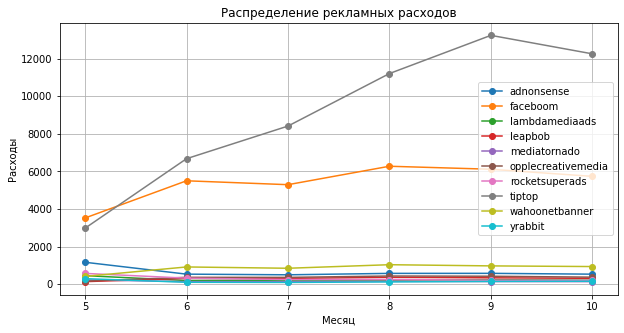

In [51]:
(
    costs
    .pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
    .plot(style='o-', title='Распределение рекламных расходов', figsize=(10,5), grid=True)
)
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.legend()
plt.show()

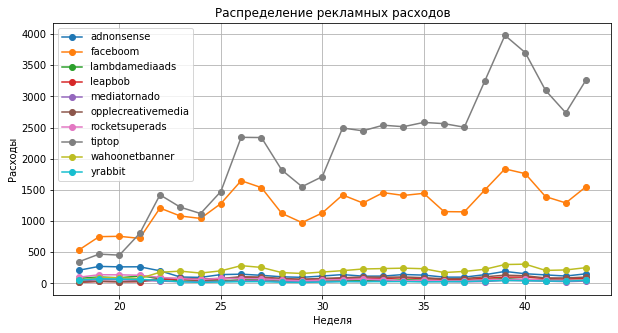

In [52]:
(
    costs
    .pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
    .plot(style='o-', title='Распределение рекламных расходов', figsize=(10,5), grid=True)
)
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.legend()
plt.show()

С помощью графика получилось наглядно отразить, что более предпочтительнымыми каналами для вложений в рекламу продукта являются tip_top и faceboom. В мае было вложено меньше всего средств на рекламу, при этом, с каждым месяцем расходы увеличивались, достигнув своей пиковой точки в октябре. Вложения в другие каналы имеют сдержанный характер и не увеличиваются с течением времени.

### Средняя стоимость привлечения одного пользователя из каждого источника

Исключим из анализа пользователей, которые не соответсвуют рассматриваемому периоду: ограничим их количество по максимальной дате привлечения (max_date). Далее, необходимо сгруппировать данные таким образом, чтобы на каждый день приходилось количество уникальных пользователей, так как только уникальные пользователи могут наглядно показать истинное количество (у одного пользователя может быть несколько подписок, например).

In [53]:
normal_date_ltv = profiles.query('dt <= @max_date')
normal_date_ltv.groupby('dt').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending = False).head(10)

,user_id
dt,
2019-09-28,1256
2019-09-29,1243
2019-09-27,1212
2019-09-22,1179
2019-09-30,1117
2019-06-30,1112
2019-10-06,1102
2019-10-27,1087
2019-09-24,1086


Рассмотрим среднюю стоимость привлечения по каждому источнику, сформировав переменную cac_mean

In [54]:
cac_mean = (
    normal_date_ltv.groupby('channel')
    .agg({'user_id': 'nunique','acquisition_cost': 'mean'})
    .sort_values(by='acquisition_cost', ascending = False)
    .rename(columns={'acquisition_cost': 'cac_mean'})
)
cac_mean

,user_id,cac_mean
channel,,
tiptop,19561,2.799
faceboom,29144,1.113
adnonsense,3880,1.008
lambdamediaads,2149,0.725
wahoonetbanner,8553,0.602
rocketsuperads,4448,0.412
opplecreativemedia,8605,0.250
yrabbit,4312,0.219
mediatornado,4364,0.219


В среднем, стоимость привлечения одного пользователя для канала tiptop составляет 2,76(вложения в который более весомые, как мы увидели по сформированным графикам). Наименьшие вложения для привлечения одного пользователя требуются для канала leapbpb - 0,2. Для органического канала привлечения стоимость привлечения составлят 0, так как пользователи сами узнают о приложении, переходя по прямой ссылке, а не по ссылке рекламного источника.

Таким образом, проведя исследование в области маркетинга, сформируем выводы:
    
- Общая стоимость расходов на маркетинг составила 105 497.3;

- В каналы привлечения пользователей tiptop(54 751) и faceboom(32 446) осуществляется больше всего инвестиций по сравнению с другими, менее востребованным каналом является yrabbit(944);

- На октябрь 2019 год приходитсся больше всего влжений в рекламу, в то время, когда в течение мая наблюдается стагнация процесса инвестирования. 

- В среднем привлечение одного пользователя (показатель CAC) из каждого источника варьируется от 0,2 до 2,76, где: больше всего инвестиций на человека выявлено для канала tiptop, менее привлекатльным каналом является leapbob.

## Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

### Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI

Для определения тенденции окупаемости вложенных инвестиций в рекламу необходимо проанализировать LTV и ROI. Рассмотрим визуализацию показателей LTV и ROI, вызвав функцию get_ltv(). 

Прежде, чем анализировать результаты, необходимо исключить из анализа канал привлечения "organic". Как ранее было указано, данный канал подразумевает "естесственную" заинтересованность пользователя в приложении: потенциальный клиент сам находит ссылку на продукт на просторах интернета, поэтому расходы на данный канал = 0. В связи с тем, что пользователей по данному каналу приходит весомое количество, неисключение канала приведет к искажению анализа.

In [55]:
profiles = profiles.query('channel != "organic"')

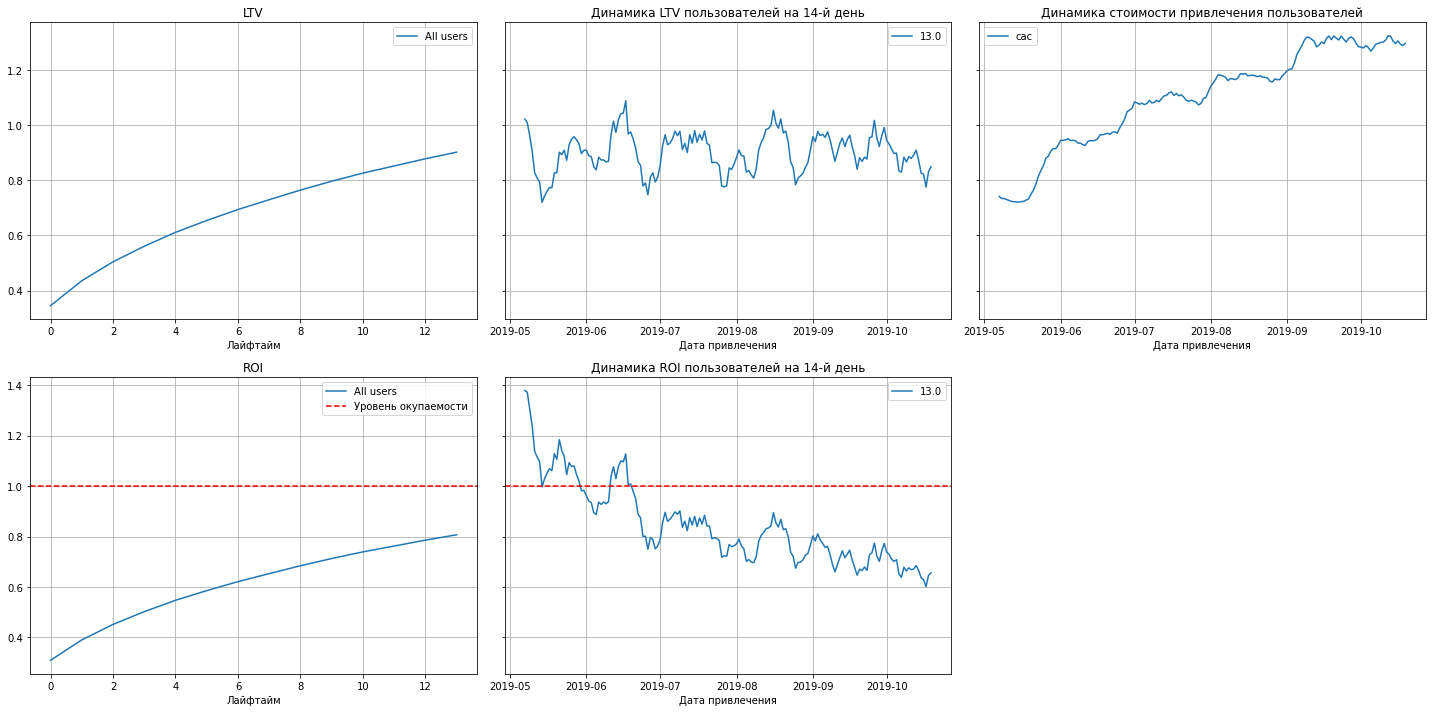

In [56]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

- LTV стабильно увеличивается: качество пользователей сохраняется, а совокупная прибыль, которую получает компания от клиентов за все время сотрудничества с ним преумножается;
- Динамика стоимости привлечения пользователя активна: стоимость привлечения постепенно увеличивается с каждым месяцем;
- Окупаемость инвестиций (ROI) не происходит: порог окупаемости не пересечён;
- Динамика окупаемости активно снижается. На момент анализа динамика опустилась ниже допустимого уровня.

### Конверсия пользователей, удержание пользователей и динамика их изменений. Визуализация показателей.

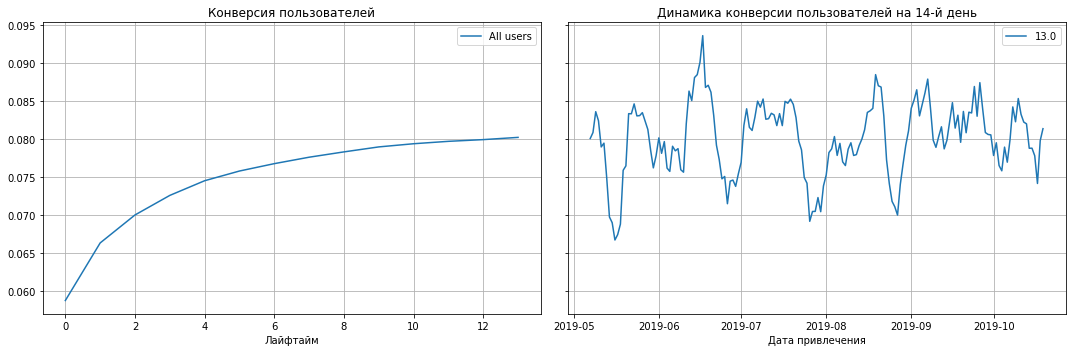

In [57]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

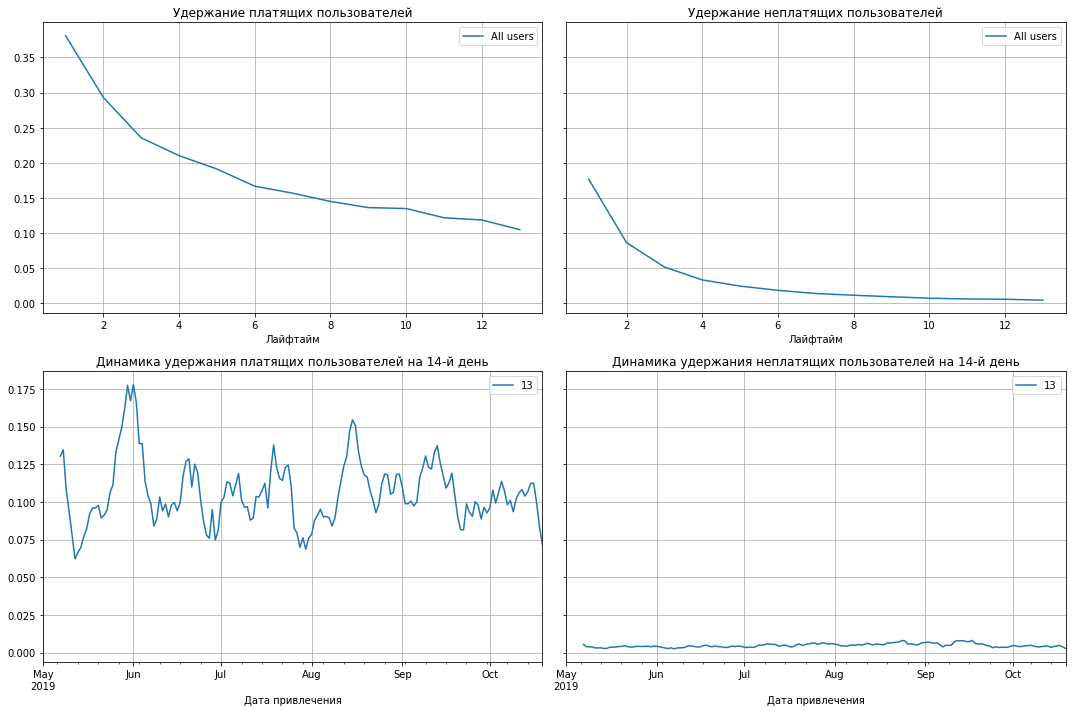

In [58]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Сравнивая график конверсии и график удержания, отметим, что конверсия постепенно растет. Время от времени данный показатель колеблется: то поднимается, то падает, но стабильно придерживается одного темпа.

При этом, процесс удержания пользователей значительно снижается с течением времени. Это может быть связано с тем, что первоначальный интерес к приложению возрастает засчет рекламы, однако, в процессе использования продукта возникают моменты, которые критичны для комфорта пользователя, заставляющие отказаться от дальнейшего использования. Процессе удержания платящих пользователей происходит более уверенно, чем с неплатящими.
    

#### Конверсия пользователей, удержание пользователей с разбивкой по устройствам

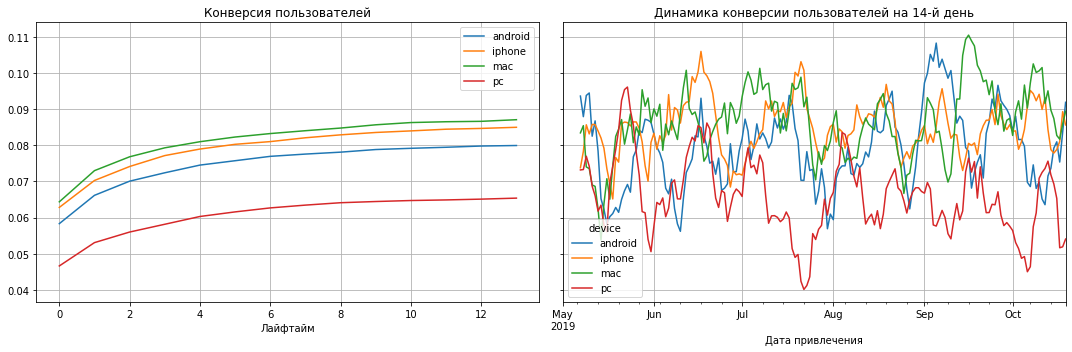

In [59]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

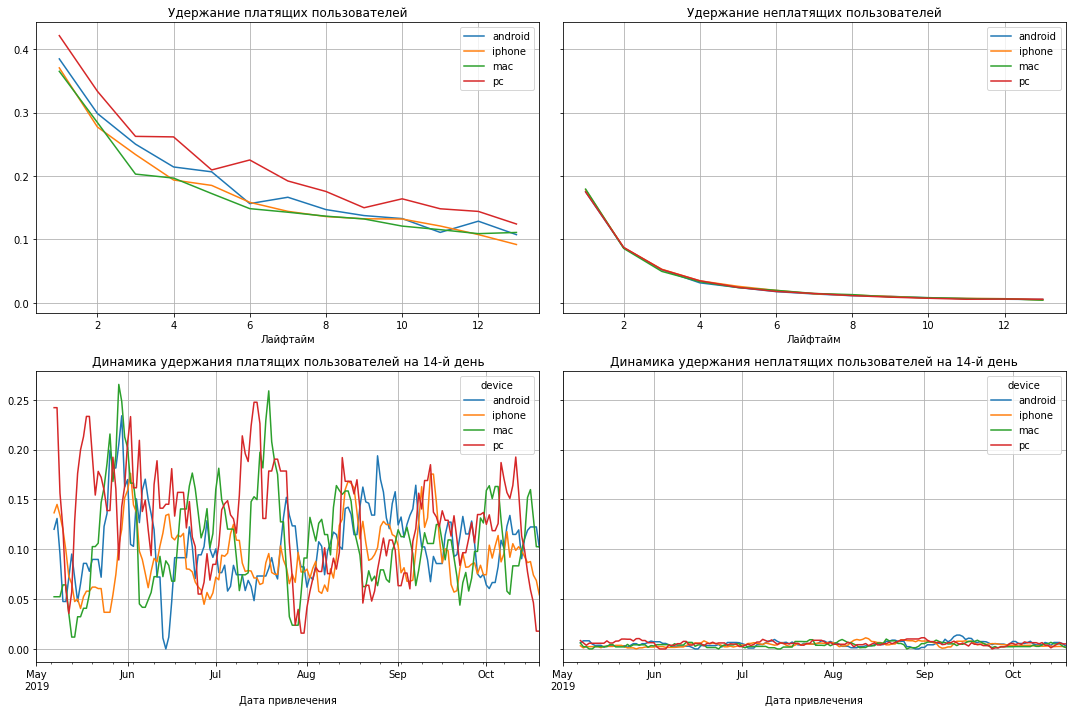

In [60]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

График конверсии пользователей в разрезе устройств показывает, что пользователи iphone и mac более склонны совершать какие-либо действия после первого взаимодействия с приложением. Отстающим по данному показателю является устройство pc.

Удержание платящих пользователей находится в динамике: среди устройств лидиром является pc, показатели по iphone и mac находятся в упадке несмотря на то, что конверсия для данных устройств превышает pc.

#### Конверсия пользователей, удержание пользователей с разбивкой по странам

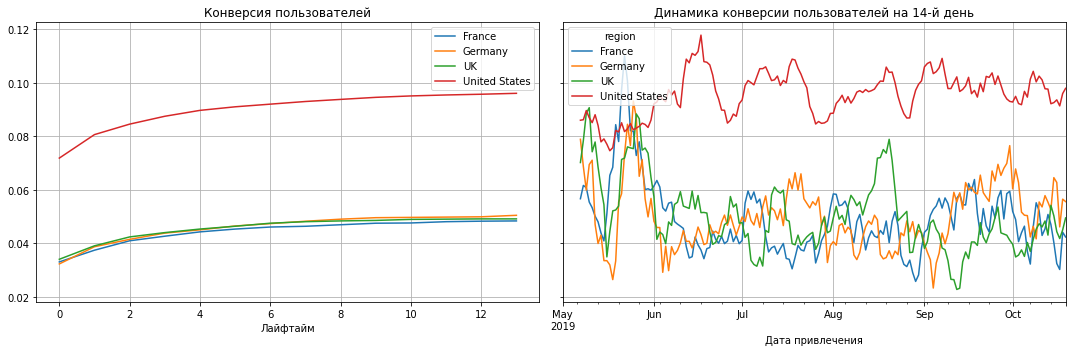

In [61]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

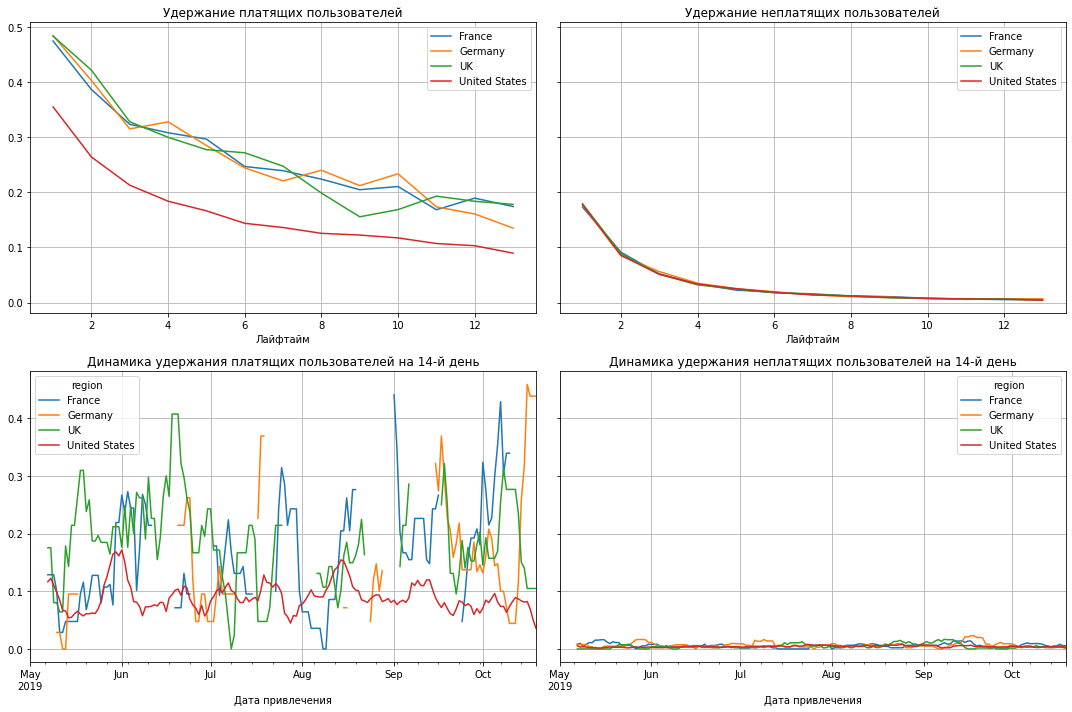

In [62]:
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Акцентом в данных графиках явлется показатели по США: конверсия значительно выше, чем в других странах, которые находятся примерно на одном уровне между собой. При этом, показатель удержания пользователей в США стремится к снижению быстрее других стран.

#### Конверсия пользователей, удержание пользователей с разбивкой по каналам привлечения

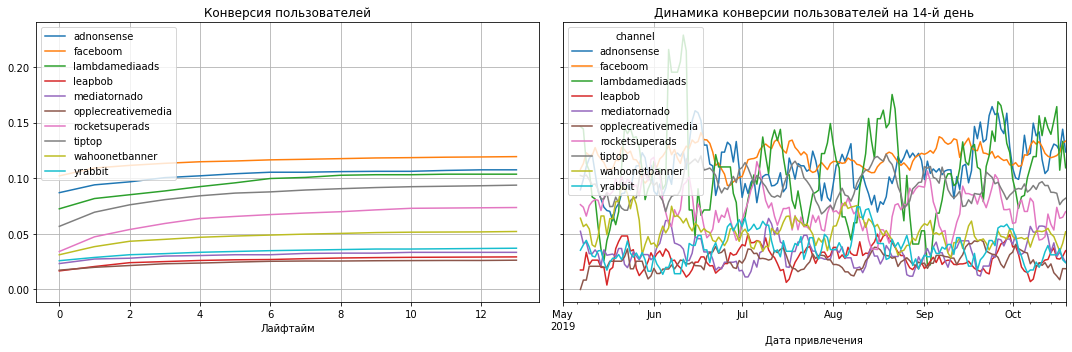

In [63]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

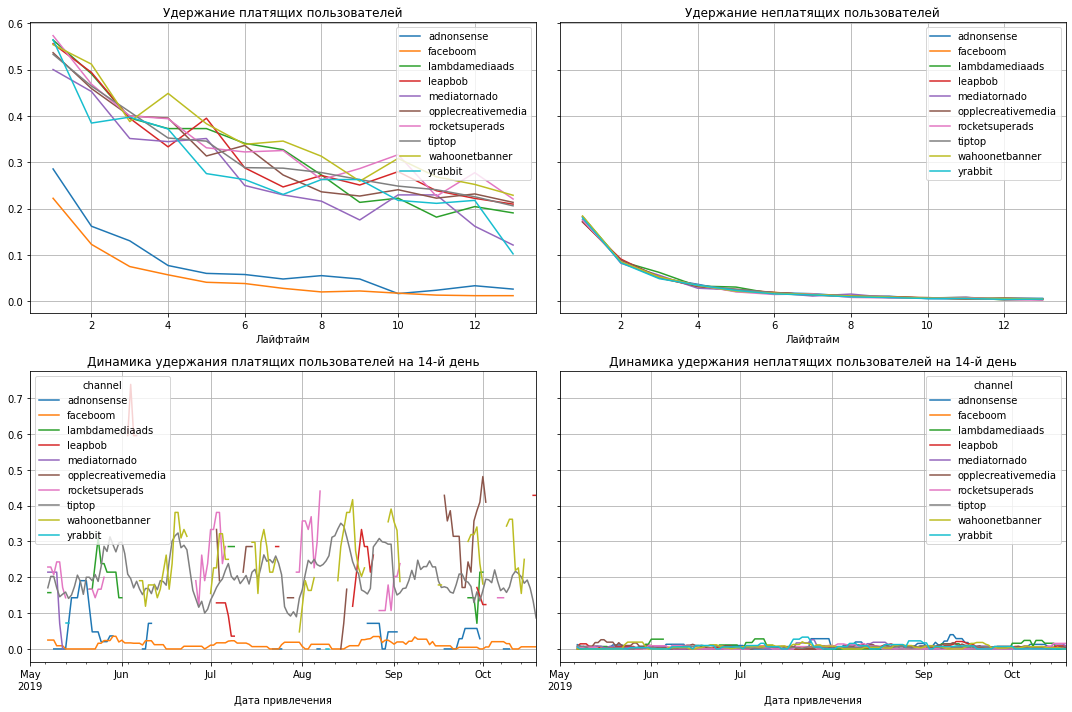

In [64]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Самый высокий показатель конверсии отражается для канала faceboom, но при этом, данный канал является отстающим при отражении показателя удержания пользователя, в том числе и в динамике на 14 день.

### Окупаемость рекламы с разбивкой по устройствам. Визуализация LTV и ROI, а также графики динамики LTV, CAC и ROI.


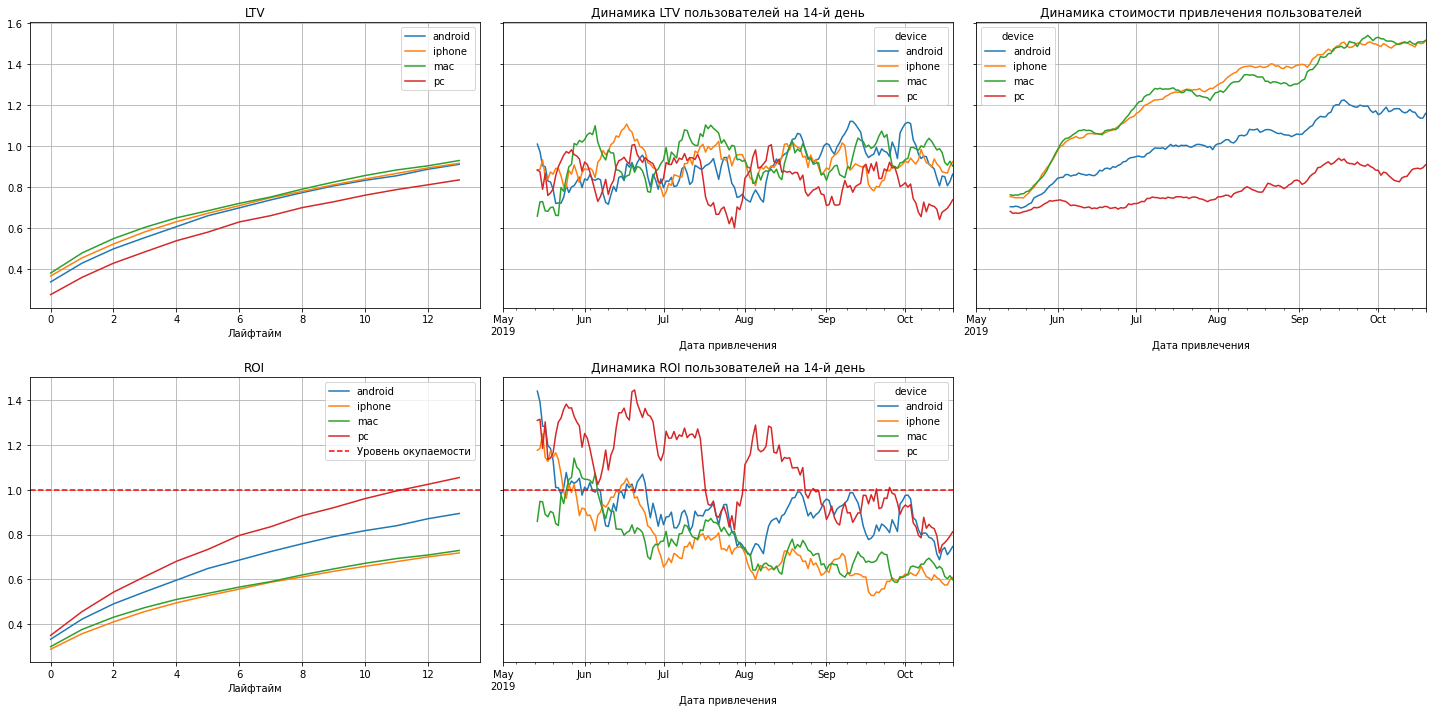

In [65]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- LTV умеренно растет, но у pc прибыль от взаимодействия с клиентом меньше, чем у остальных устройств: android6 iphone6 mac;
- Стоимость привлечения пользователей увеличивается с каждым месяцем: лидирами по стоимости привлечения является iphone и mac. Однако, окупаемость(ROI) инвестиций происходит только по пользователям, которые используют pc для приложения, но динамика окупаемости не имеет стабильный характер.
- Динамика окупаемости постепенно снижается, в особенности, стоит обратить внимание на пользователей pc, которые могут приносить положительные результаты.

### Окупаемость рекламы с разбивкой по странам. Визуализация LTV и ROI, а также графики динамики LTV, CAC и ROI.

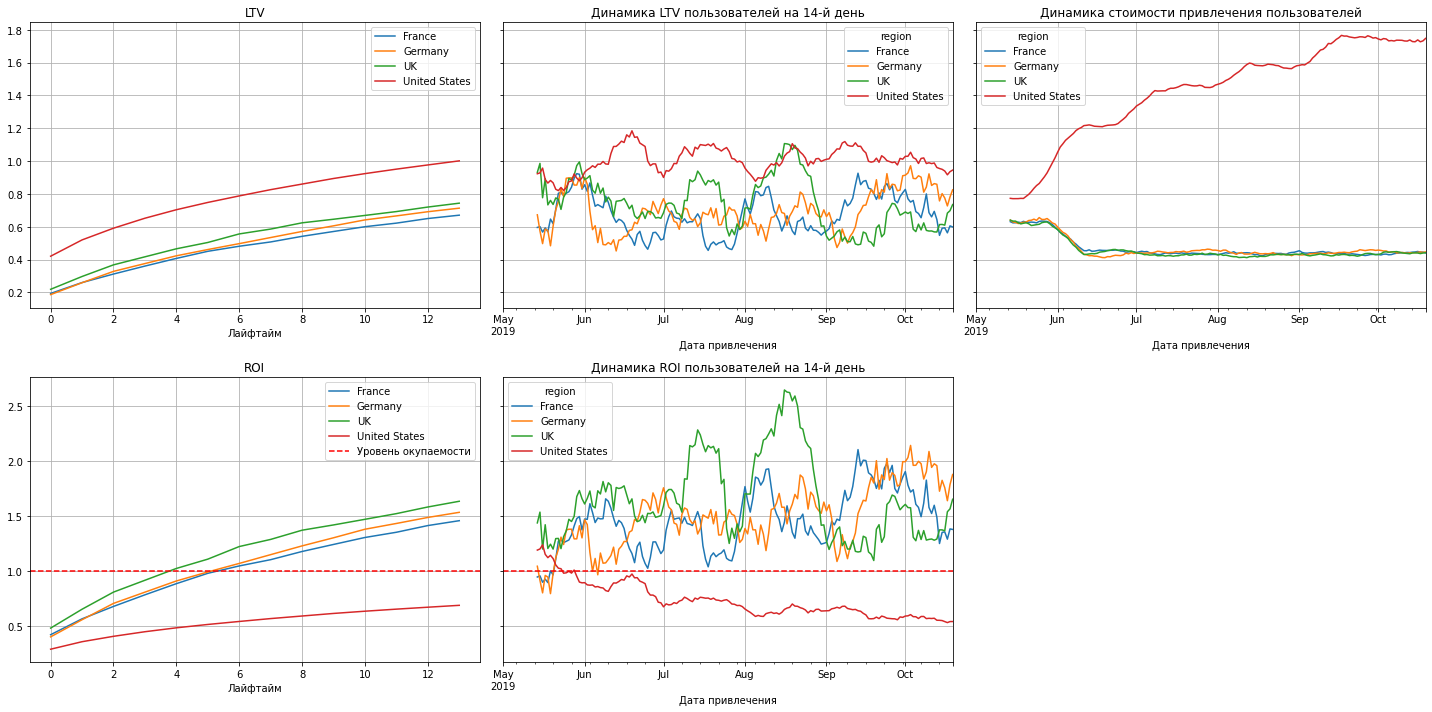

In [66]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- LTV постепенно растет: лидером среди стран по LTV является США;
- Возожность привлечения пользователей в США требует больших вложений, чем в других странах. Вложения в Германии, Великобритании и Франции сопоставимы;
- Затраты, вложенные в рекламу, не окупаются только в США (порог окупаемости не пересечен). Также, динамика окупаемости во всех странах, кроме США, стабильна.

### Окупаемость рекламы с разбивкой по рекламным каналам. Визуализация LTV и ROI, а также графики динамики LTV, CAC и ROI.

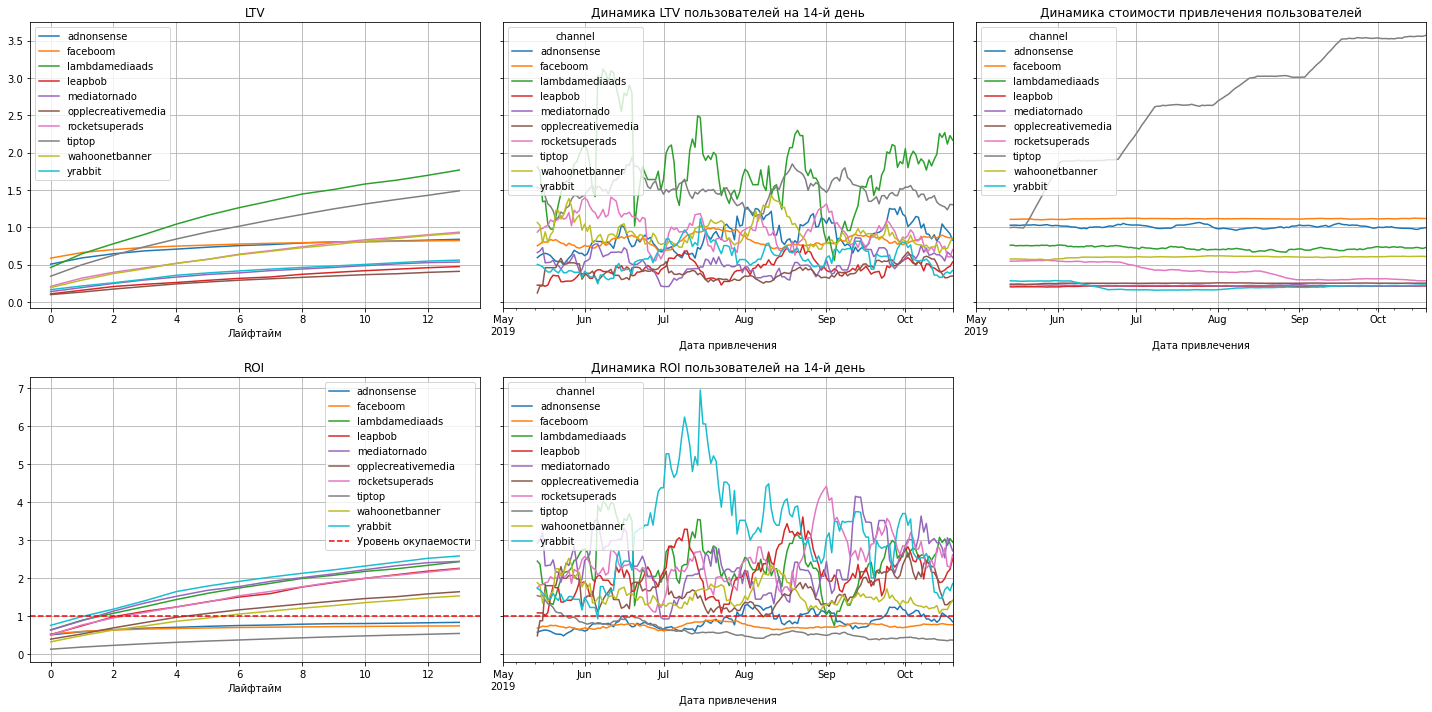

In [67]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Из полученных графиков мы видим следующее:

- В рамках каждого канала привлечения LTV достаточно стабилен на протяжении рассматриваемого периода;
- Динамика стоимости привлечения клиентов (САС) относительно стабильна по всем каналам, кроме tiptop: c каждым месяцем происходит увеличение рекламного бюджета с целью привлечения клиентов через tiptop. Как и ранее было отмечено, компания предпочитает вести сдержаннную инвестиционную политику по инвестированию в рекламу;
- Реклама в большем степени окупается: показатели большинства каналов превышает уровень окупаемости. Исключением являются adnonsense, faceboom, tiptop: данные каналы стремятся к окупаемости, но пока не доходят до такого положения;

1. Окупается ли реклама, направленная на привлечение пользователей в целом?
- На момент анализа вложенные инвестиции в рекламу не окупаются, однако, кривая окупаемости стремится вверх. Данный факт связан с весомыми затратами в те сегменты, где окупаемость ниже допустимого значения, что зачастую замещает большой процент окупаемого сегмента (например, вложенные инвестиции в привлечение пользователей США и других странах).
2. Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Iphone и мас могут оказывать негативное влияние на окупаемость рекламы, так как вложения достаточно высоки, а окупаемость у данных продуктов достаточно низкая. При этом, стоит обратить внимание, что окупаемость рекламы для pc в динамике за 14 дней резко снижается и остается немного выше iphone и mac при разных начальных положениях.
- США не поравдывает весомые вложения в рекламу, так как окупаемость ниже допустимого порога, в то время, как в других странах окупаемость растет.
- Значительные вложения в каналы tiptop и faceboom не оправданы в связи с отсутствием окупаемости.
3. Чем могут быть вызваны проблемы окупаемости?
- Контекст рекламы характеризует приложение не в полном объеме, что снижает заинтересованность потенциальных клиентов;
- Отсутствие целевой аудитории на платформе размещения рекламы;
- Некомпетентность специалистов по продвижению продукта, которые в дальнейшем могут делать неправильные акценты и смещать внимание пользователю в неэффективную сторону.

Таким образом, проанализировав показатели конверсии, удержания, LTV и ROI, сформируем следующие выводы:
- Показтели конферсии и удеражания пользователей постепенно снижается;
- Весомые вложения в рекламу не обуславливают значительную окупаемость, которая на момент анализа находится в упадке;
- Среди устройств, наименьшие вложения были сосредоточены на pc, однако, данное устройство обусловило большую окупаемость вложений.
- Среди анализируемых стран, большие вложения приходятся на США, при этом, только реклама в США не окупается;
- Среди каналов привлечения, самыми финансово-неоправданными стали tiptop и faceboom.


# Этапы исследования

- Обзор и предобработка данных
- Определение функций для анализа LTV, ROI, коэффициента удержания и конверсии
- Проведение исследовательского анализа данных
- Анализ расходов, произведенных в целях рекламы продукта
- Анализ окупаемости вложенных инвестиций.

## Вывод
Мною было проведено исследование данных о поведении пользователей в рамках рекламных кампаний по их привлечению. Анализ показал, что совокупность пользователей распределена среди таких стран, как США, Великобритания, Франция, Германия, где США является лидером среди привлеченных потребителей. Также, важно отметить, что среди устройств iphone считается самым востребованным, среди рекламных каналов привлечения tiptop и faceboom, но также и популярен и органический, где отсутствуют рекламные расходы.

Общая стоимость расходов на маркетинг составила 105 497, а средняя стоимость привлечения одного пользователя из каждого источника варьируется от 0,2 до 2,76, где: больше всего инвестиций на человека выявлено для канала tiptop, менее привлекательным каналом является leapbob.

Анализируя окупаемость вложенных инвестиций в рекламу, был получен вывод, что реклама не окупается. О данном факте свидетельствует общий коэфициент нестабильный удержания, а динамика окупаемости активно снижается. На момент анализа динамика опустилась ниже допустимого уровня. В связи с эттим, следует предположить, что компания вкладывает слишком большие средства в рекламу, которая не несет за собой привлечение необходимого количества пользователей.

Наблюдается активное вложение инвестиций для сегмента пользователей в США, в каналы привлечения tiptop  и faceboom, в устройства iphone, mac, android, которые в конечном итоге не окупаются. Весомые вложения по данным направлениям хорошо влияют на конверсию пользователей, однако удержание по ним находится на самом низком уровне среди других каналов привлечения и других стран. Лидером среди удержания пользователей является устройство pc, показатели по iphone и mac находятся в упадке несмотря на то, что конверсия для данных устройств превышает pc.

Причины неэффективности:
- отсутствие целевой аудитории, большое количество крупных устоявшихся конкурентов по сопоставимой тематике приложения в США
- неинформативно составленная реклама, которая снижает успех у каналов привлечь пользователей;
- техническое оснащение низкого качества, что заставляет приложение медленно работать на определенных устройствах.

# Рекомендации
Анализ показал,  при дальнейших рекламных кампаниях необходимо обратить внимание на размер вложений в рекламу и способы ее проведения: в данном случае больший размер вложений не обеспечивает пропорциональное привлечение клиентов, например, как в США или по каналу привлечения tiptop и faceboom. На мой взгляд, стоит отказаться от данных каналов привлечения сфокусировать свое внимание на остальных каналах, так как показатель удержания пользователей и размер полученной прибыли в долгсорочной перспективе не сопоставим с размером вложенных средств.
Помимо этого, считаю целесообразным более детальное изучение рынка различных стран, так как у их пользователей различные потребности: то, что привлекает пользователя в одном государстве, может не привлекать в другом.

